In [39]:
!pip install --force-reinstall --user mlbox

Processing /home/aamir/.cache/pip/wheels/71/cf/ee/56fbc5e00c8f00aa01bd6dd5a04c40d42392271b714ac52cd8/mlbox-0.8.2-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/19/b9/bda9781f0a74b90ebd2e046fde1196182900bd4a8e1ea503d3ffebc50e7c/numpy-1.17.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/63/12/704382c3081df3ae3f9d96fe6afb62efa2fa9749be20c301cd2797fb0b52/hyperopt-0.1.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e9/69/f5e05f578585ed9935247be3788b374f90701296a70c8871bcd6d21edb00/matplotlib-3.0.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/87/f7/bb0ec32a3f3dd74143a3108fbf737e6dcfd47f0ffd61b52af7106ab7a38a/tables-3.5.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b0/16/63576a1a001752e34bf8ea62e367997530dc553b689356b9879339cf45a4/xlrd-1.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/package

  Using cached https://files.pythonhosted.org/packages/ce/42/3aeda98f96e85fd26180534d36570e4d18108d62ae36f87694b476b83d6f/Werkzeug-0.16.0-py2.py3-none-any.whl
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp36-cp36m-linux_x86_64.whl size=44104 sha256=68a39e4fe37bab047a54647505290ec37c780a300e4c339f20ddc672f9cab0b2
  Stored in directory: /home/aamir/.cache/pip/wheels/d9/45/dd/65f0b38450c47cf7e5312883deb97d065e030c5cca0a365030
Successfully built pyyaml
ERROR: launchpadlib 1.10.6 requires testresources, which is not installed.
ERROR: pyopenssl 19.1.0 has requirement cryptography>=2.8, but you'll have cryptography 2.1.4 which is incompatible.
ERROR: botocore 1.13.28 has requirement python-dateutil<2.8.1,>=2.1; python_version >= "2.7", but you'll have python-dateutil 2.8.1 which is incompatible.
  Found existing installation: numpy 1.17.0
    Uninstalling numpy-1.17.0:
      Successfully uninstalled numpy-1.17.0
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
  

In [18]:
!pip install bs4

Processing /home/aamir/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472/bs4-0.0.1-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3b/c8/a55eb6ea11cd7e5ac4bacdf92bac4693b90d3ba79268be16527555e186f0/beautifulsoup4-4.8.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/81/94/03c0f04471fc245d08d0a99f7946ac228ca98da4fa75796c507f61e688c2/soupsieve-1.9.5-py2.py3-none-any.whl


In [1]:
import tensorflow as tf
from tensorflow import keras
import keras
import os
import sys
import ast
import cv2
import imageai

/home/aamir/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aamir/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aamir/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/aamir/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [2]:
from imageai.Detection import ObjectDetection

In [6]:
exec_path = os.getcwd()
print('Current path : {}'.format(exec_path))
detections=[]
try:
    obj_det = ObjectDetection()
    obj_det.setModelTypeAsRetinaNet()
    obj_det.setModelPath(os.path.join(exec_path, 'resnet50_coco_best_v2.0.1.h5'))
    obj_det.loadModel()

    detections = obj_det.detectObjectsFromImage(input_image=os.path.join(exec_path, 'image.png'),
                                               output_image_path=os.path.join(exec_path, 'imagenew.png'))
except Exception as e:
    print('error with envt variables')
    print(e)
    pass


Current path : /home/aamir/python-environments/sih


In [17]:
for item in detections:
    print('{} : {}'.format(item['name'], item['percentage_probability']))
#     print(item['name'])

person : 57.203954458236694
person : 52.57992148399353
person : 70.81103920936584
person : 76.99862718582153
person : 79.40089702606201
bicycle : 81.03843331336975
person : 83.66729021072388
person : 89.41196203231812
truck : 60.61033606529236
person : 69.65760588645935
bus : 97.9242205619812
truck : 83.94351005554199
car : 72.50525951385498


In [16]:
traffic = 0
objects = ['truck','car','bicycle']
for item in detections:
    if item['name'] in objects:
        traffic+=1
print("Traffic count : ",traffic)

Traffic count :  4


In [9]:
import matplotlib.pyplot as plt
im = cv2.imread('image.png')

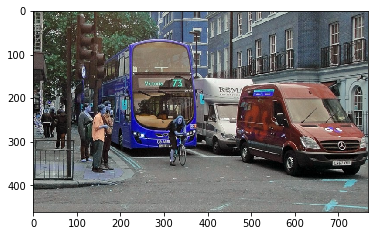

In [10]:
plt.imshow(im)